In [1]:
#Importing the necessary libraries for EDA, to create models on the dataset and to evaluate the performance of the data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score ,f1_score, precision_score 

In [2]:
#Loading the dataset and printing the first 5 records of the dataset

diabetes=pd.read_csv("diabetes-2-1.csv")
diabetes.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Checking the number of rows and coloums in the dataset

diabetes.shape

(768, 9)

In [4]:
#Checking the type of the varibles and if there are any null values present in the dataset

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Decribes the nature of the dataset

data_description=diabetes.describe()
data_description

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Checking if the variable are corelated

diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

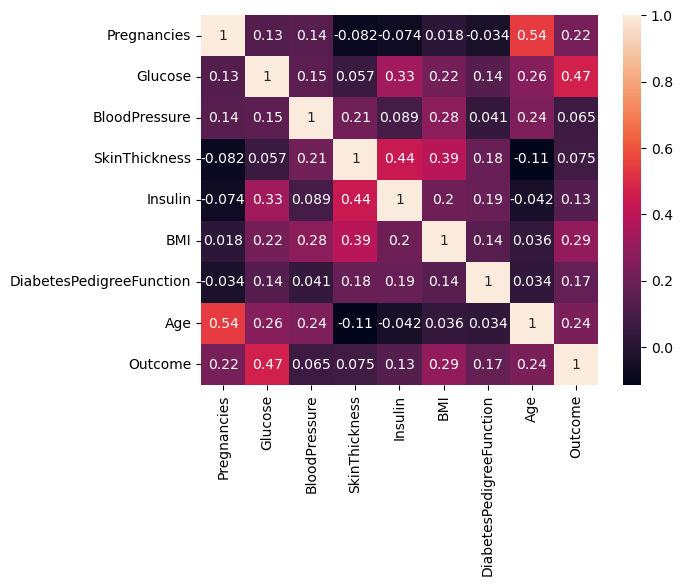

In [7]:
#Visualising the correlation in the dataset with the help of seaborn library

sns.heatmap(diabetes.corr(),annot=True)

<Axes: xlabel='Outcome', ylabel='count'>

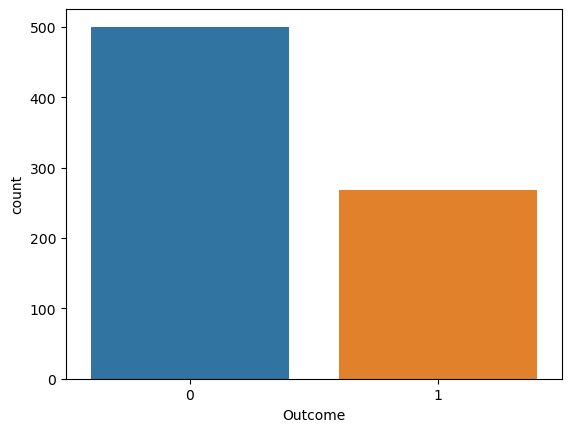

In [8]:
#plotting a graph to check the number of records in each outcome

sns.countplot(x="Outcome", data=diabetes)

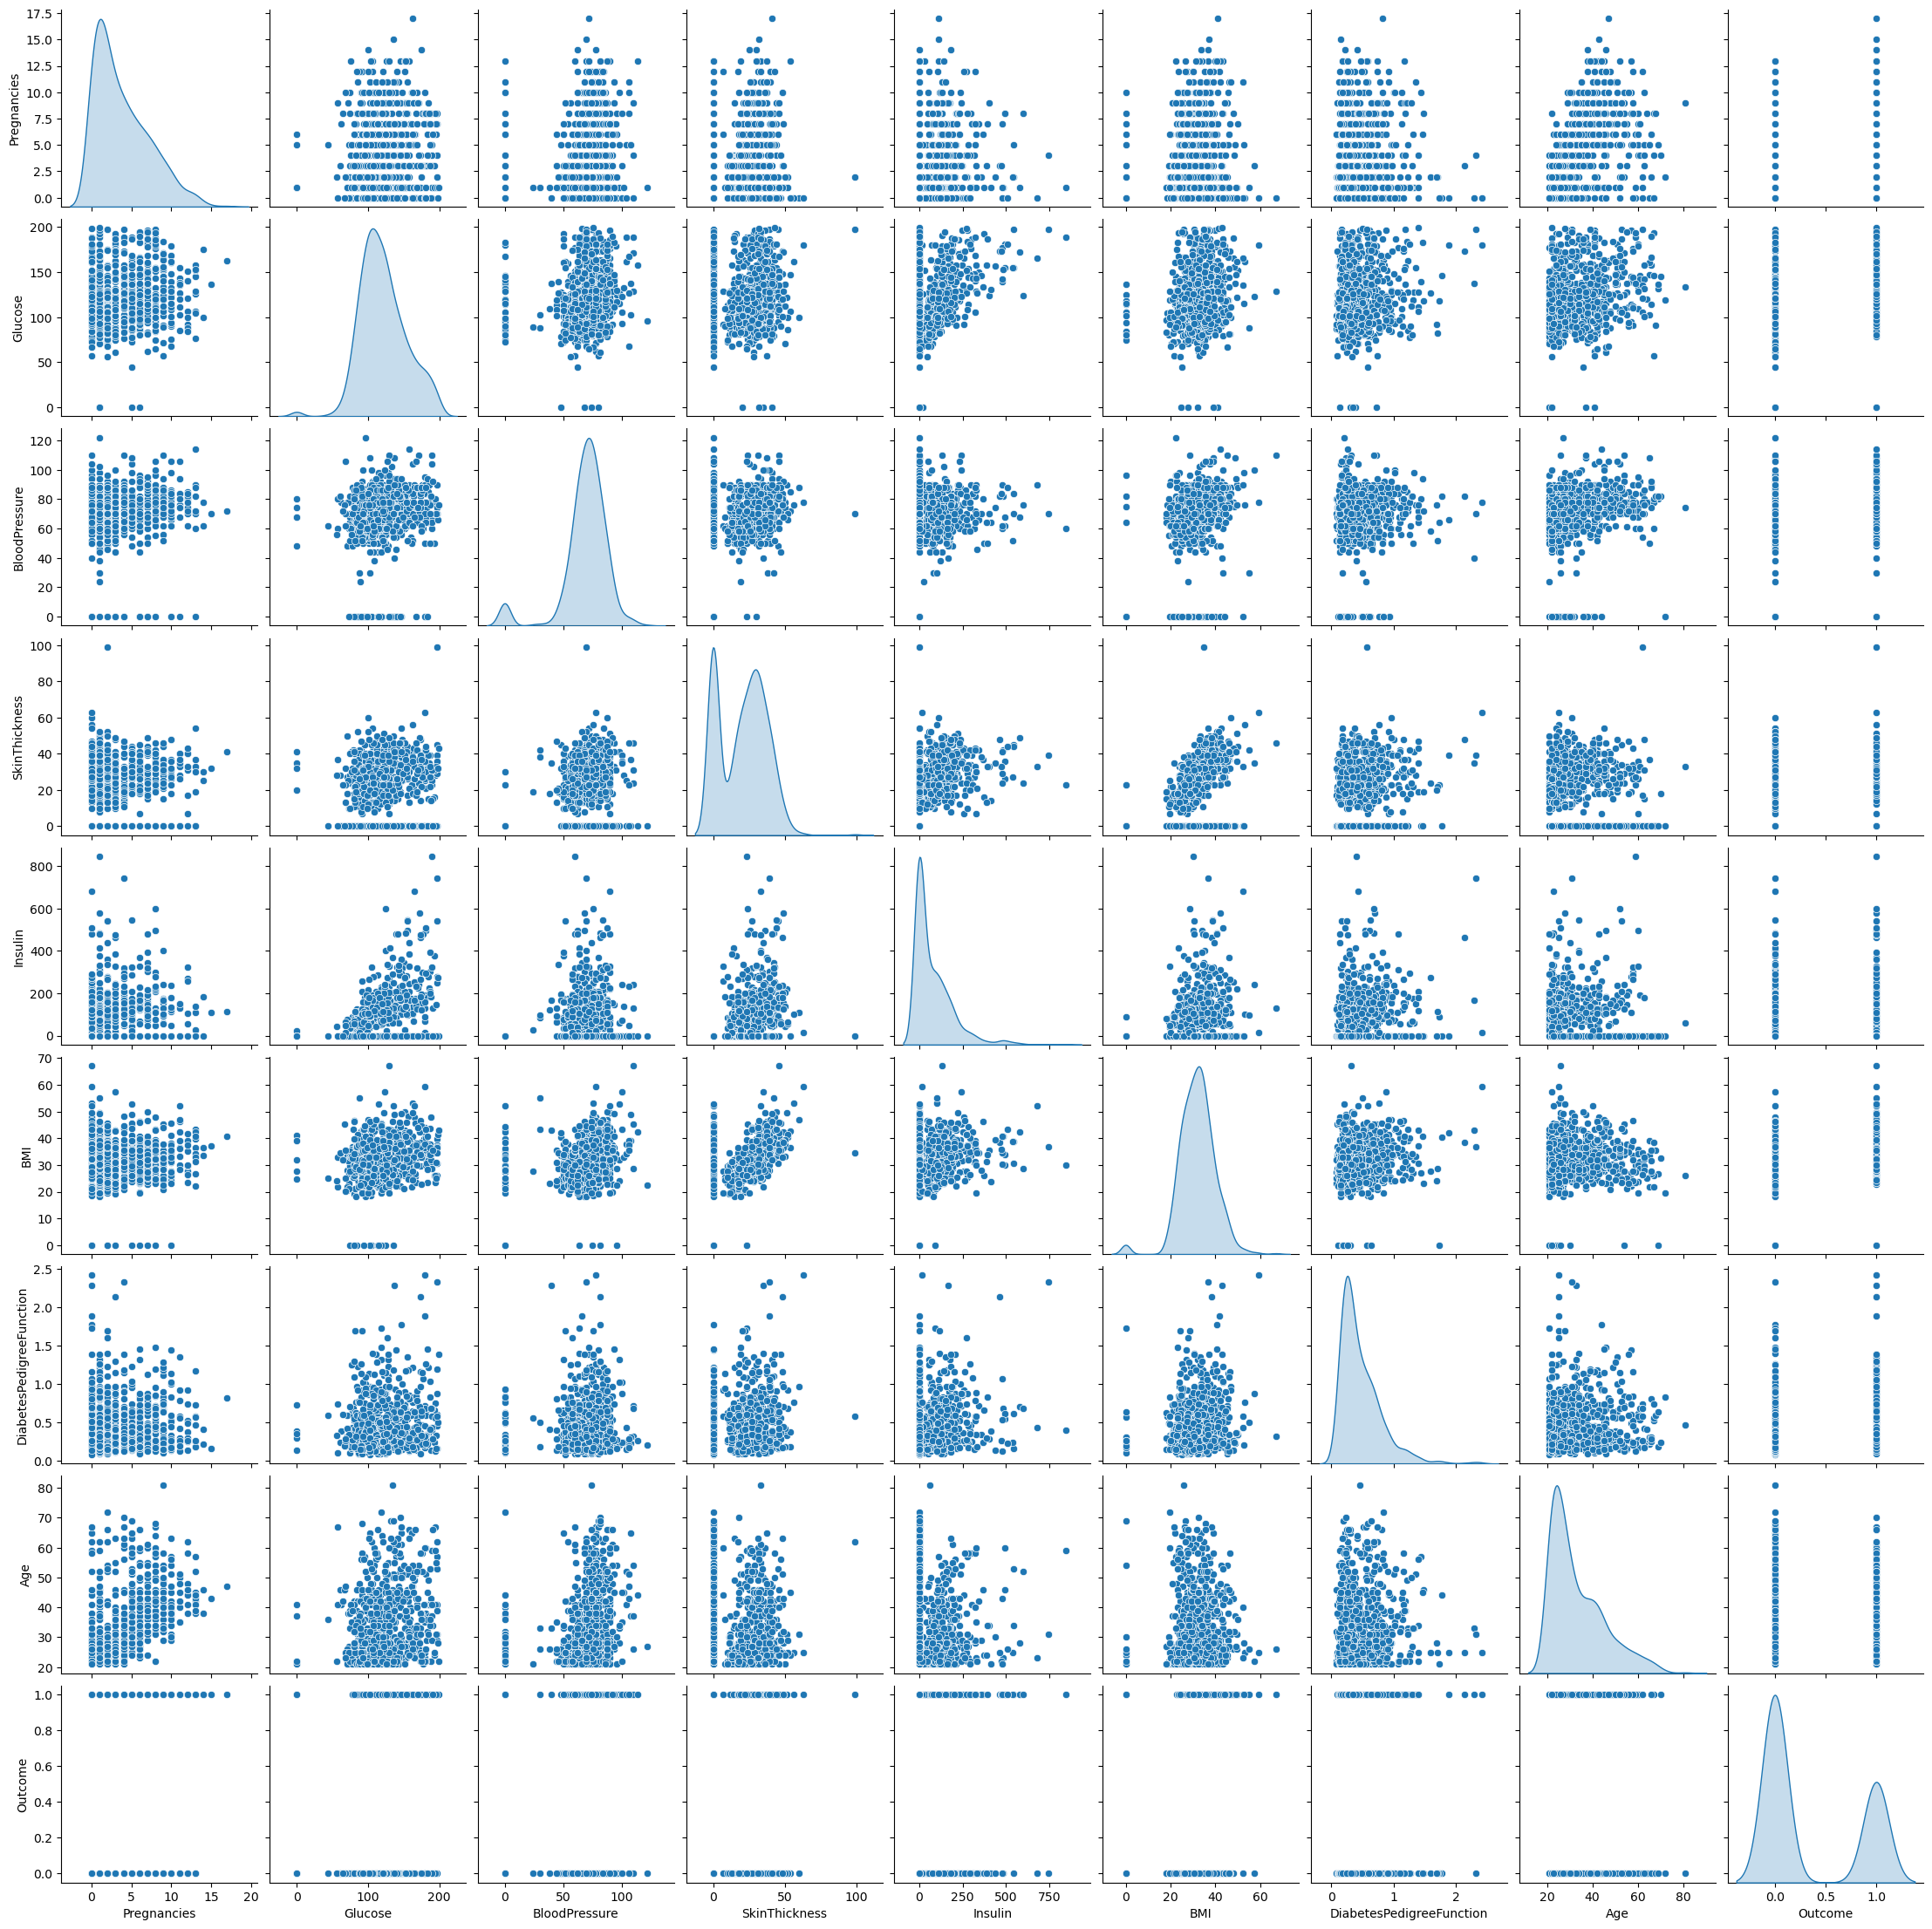

In [9]:
#Checking the distribution od the data

sns.pairplot(diabetes, diag_kind='kde')
plt.show()

In [10]:
#Looking at the dataframe, It is quite visible that there are many 0 values in insulin
#Let's check the number of 0 values present in insulin model

zero_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = diabetes['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes[diabetes[feature]==0][feature].count()
    print('{0} 0 number of cases {1}, percent is {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))


Pregnancies 0 number of cases 111, percent is 14.45 %
Glucose 0 number of cases 5, percent is 0.65 %
BloodPressure 0 number of cases 35, percent is 4.56 %
SkinThickness 0 number of cases 227, percent is 29.56 %
Insulin 0 number of cases 374, percent is 48.70 %
BMI 0 number of cases 11, percent is 1.43 %


In [11]:
#As we can see above, nearly 50% of the data in insulin is of the value zero and the ration is high for skinthickness as well
#Lets change the corresponding zero values with the median values of their features

diabetes_median = diabetes[zero_features].median()
diabetes[zero_features]=diabetes[zero_features].replace(0, diabetes_median)

In [12]:
#Here we can see that the zero values has bee changed to their repective medians

diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


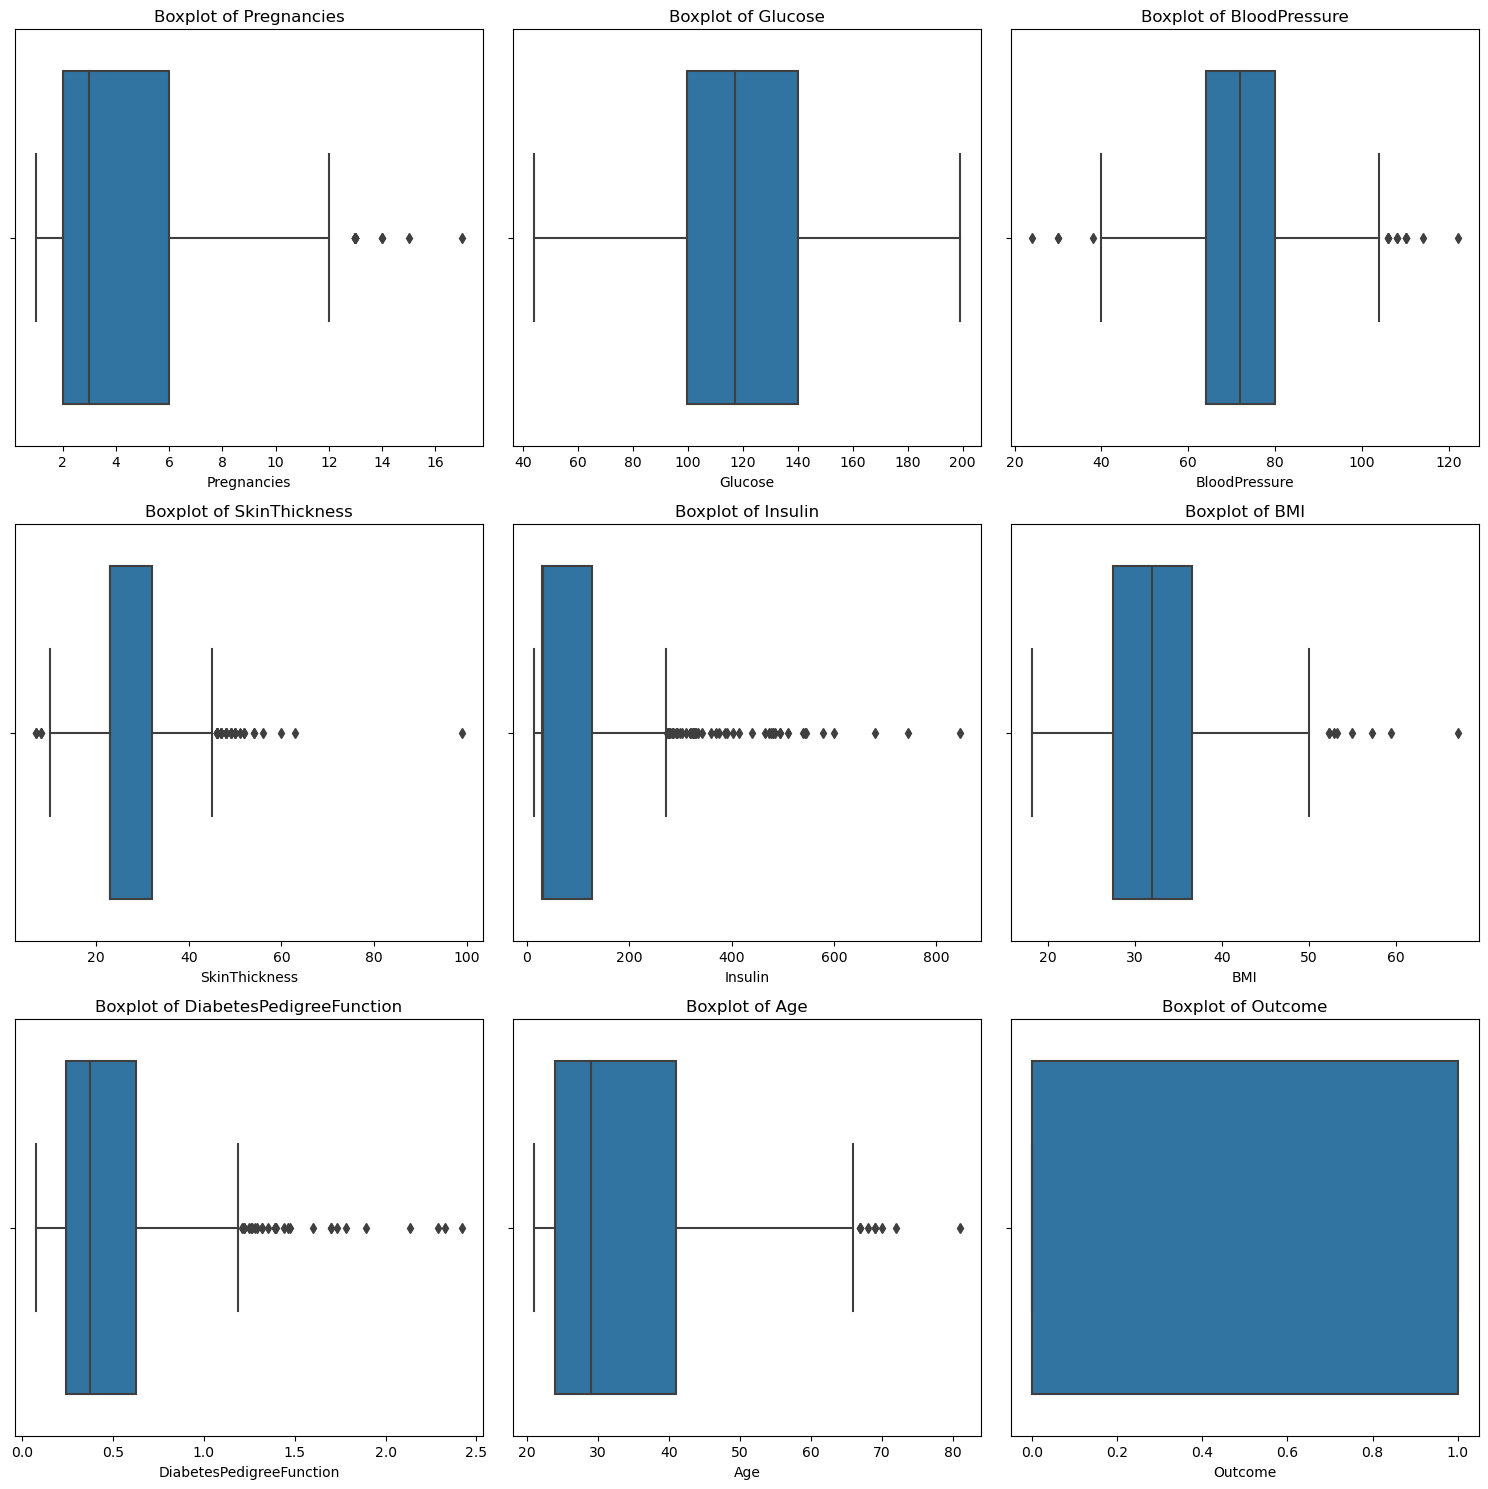

In [13]:
#Plotting boxplot to check if there are outliers

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

for i, c in enumerate(diabetes.columns):
    sns.boxplot(x=c, data=diabetes, ax=axes[i])
    axes[i].set_title(f'Boxplot of {c}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



In [14]:
#Function to remove outliers from each feature using IQR method

def cleanColumn(data,columns, thr = 2):
    column_desc = data_description[columns]
    
    q3 = column_desc[6]
    q1 = column_desc[4]
    IQR = q3 - q1
    
    top_limit_clm = q3 + thr * IQR
    bottom_limit_clm = q1 - thr * IQR
    
    filter_clm_bottom = bottom_limit_clm < data[columns]
    filter_clm_top = data[columns] < top_limit_clm
    
    filters = filter_clm_bottom & filter_clm_top
    
    data = data[filters]
    
    print("{} of dataset after column {}".format(data.shape, columns))
    
    return data

In [15]:
for i in diabetes.columns:
    diabetes = cleanColumn(diabetes,i)

(767, 9) of dataset after column Pregnancies
(767, 9) of dataset after column Glucose
(765, 9) of dataset after column BloodPressure
(764, 9) of dataset after column SkinThickness
(742, 9) of dataset after column Insulin
(739, 9) of dataset after column BMI
(727, 9) of dataset after column DiabetesPedigreeFunction
(726, 9) of dataset after column Age
(726, 9) of dataset after column Outcome


In [16]:
#All the outliers were removed

diabetes.shape

(726, 9)

In [17]:
#Defining dependent and independent variable

x=diabetes.drop("Outcome",axis=1)
y=diabetes["Outcome"]

In [18]:
#Splitting the data into train data and test data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2,random_state=7)

In [19]:
#Shape of all the split data

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (580, 8)
x_test shape:  (146, 8)
y_train shape:  (580,)
y_test shape:  (146,)


In [20]:
#Creating the below lists for plotting a graph of the models performance

columns=['LogisticRegression', 'DecisionTreeClassifier','RandomForestClassifier','SVC','NaiveBayes','KNNclassifier']
result_testAcc=[]
result_testRec=[]
result_testF1=[]
result_testprec=[]

result_trainAcc=[]
result_trainRec=[]
result_trainF1=[]
result_trainprec=[]

In [21]:
#Creating a generic function to fit the dataset into all the ML techniques

def getModel(model):
    model.fit(x_train, y_train)
    ytest_pred = model.predict(x_test)
    ytrain_pred = model.predict(x_train)
    accuracy_test = accuracy_score(ytest_pred, y_test)
    recall_test = recall_score (ytest_pred, y_test)
    f1_test = f1_score (ytest_pred, y_test)
    prec_test = precision_score(ytest_pred, y_test)
    accuracy_train = accuracy_score(ytrain_pred, y_train)
    recall_train = recall_score (ytrain_pred, y_train)
    f1_train = f1_score (ytrain_pred, y_train)
    prec_train = precision_score(ytrain_pred, y_train)
    result_testAcc.append(accuracy_test)
    result_testRec.append(recall_test)
    result_testF1.append(f1_test)
    result_testprec.append(prec_test)
    result_trainAcc.append(accuracy_train)
    result_trainRec.append(recall_train)
    result_trainF1.append(f1_train)
    result_trainprec.append(prec_train)
    sns.heatmap(confusion_matrix(ytest_pred, y_test), annot=True )
    plt.title('Confusion Matrix on Test')
    print(model)
    print( '\r\nAccuracy on test is : \t' , accuracy_test , '\nReCall on test is : \t', recall_test, '\nF1 on test is : \t', f1_test, '\nPrecision on test is : \t', prec_test)
    print( '\r\nAccuracy on train is : \t' , accuracy_train , '\nReCall on train is : \t', recall_train, '\nF1 on train is : \t', f1_train, '\nPrecision on train is : \t', prec_train)

# Logistic Regression

LogisticRegression(max_iter=1000)

Accuracy on test is : 	 0.7534246575342466 
ReCall on test is : 	 0.8 
F1 on test is : 	 0.6086956521739131 
Precision on test is : 	 0.49122807017543857

Accuracy on train is : 	 0.803448275862069 
ReCall on train is : 	 0.7516339869281046 
F1 on train is : 	 0.6686046511627907 
Precision on train is : 	 0.6020942408376964


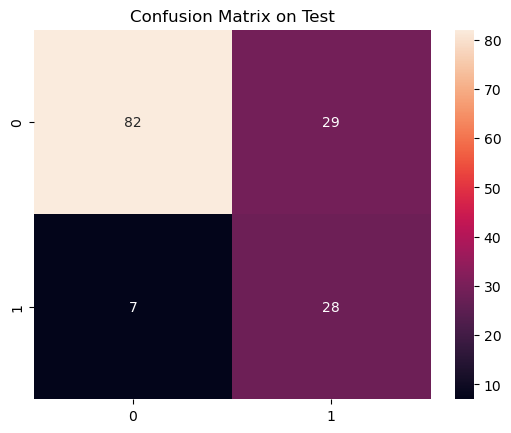

In [22]:
LR_model = LogisticRegression(max_iter=1000)
getModel(LR_model)

# Decision Tree Classifier

In [23]:
#hyperparameter tuning using gridsearch to find out the parameters which would give the best results

p={'max_depth': [ 2,3,4,5,6,8,10], 'max_leaf_nodes':[2,3,4,5,6,7,8]}
DT = DecisionTreeClassifier()
DTmodels = GridSearchCV(DT, p)
DTmodels.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 10],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8]})

In [24]:
DTmodels.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=8)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)

Accuracy on test is : 	 0.7054794520547946 
ReCall on test is : 	 0.675 
F1 on test is : 	 0.5567010309278351 
Precision on test is : 	 0.47368421052631576

Accuracy on train is : 	 0.803448275862069 
ReCall on train is : 	 0.7583892617449665 
F1 on train is : 	 0.6647058823529413 
Precision on train is : 	 0.5916230366492147


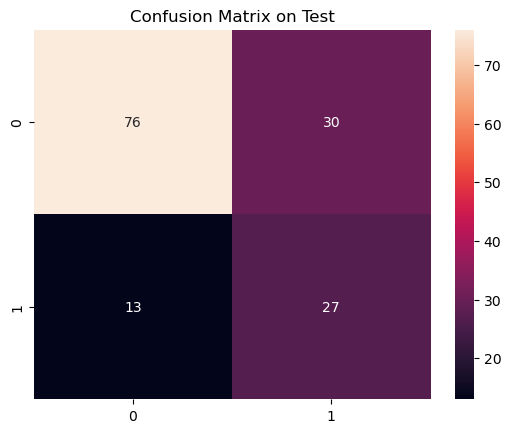

In [25]:
#Creating a Decision Tree model with the best features obtained from Gridsearch

DT_bestmodel= DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)
getModel(DT_bestmodel)

# Random Forest Classifier

In [26]:
#Hyperparameter tuning using gridsearch to find out the parameters which would give the best results

rfc = RandomForestClassifier()

p_rfc = {"n_estimators" : range(1,50), "criterion" : ["gini", "entropy"], "max_features" : ["sqrt","log2"]}

RFmodels = GridSearchCV(estimator = rfc, param_grid = p_rfc, cv = 4)
RFmodels.fit(x_train,y_train)

best_params = RFmodels.best_params_

print("Best parameters:", best_params)


Best parameters: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 32}


RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=30)

Accuracy on test is : 	 0.7465753424657534 
ReCall on test is : 	 0.7380952380952381 
F1 on test is : 	 0.6262626262626264 
Precision on test is : 	 0.543859649122807

Accuracy on train is : 	 1.0 
ReCall on train is : 	 1.0 
F1 on train is : 	 1.0 
Precision on train is : 	 1.0


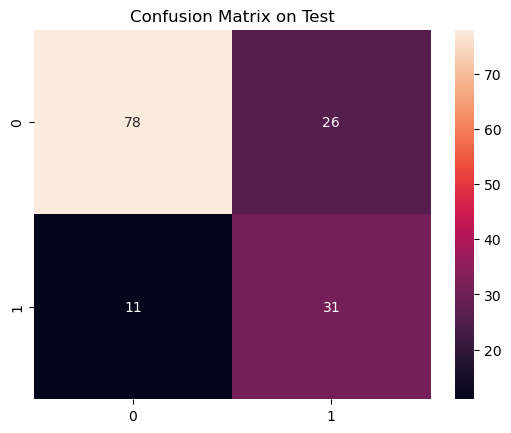

In [27]:
#Creating a Random Forest Classification model with the best features obtained from Gridsearch

RF_bestmodel = RandomForestClassifier(criterion='entropy', max_features= 'log2', n_estimators= 30)
getModel(RF_bestmodel)

# Support Vector Classifier

In [28]:
#Hyperparameter tuning using gridsearch to find out the parameters which would give the best results

grid_parameters = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
svcmodels= GridSearchCV(SVC(),grid_parameters,refit=True,verbose=3)
svcmodels.fit(x_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.672 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.672 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.672 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.672 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.664 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.672 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.672 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.672 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.672 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.664 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.672 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.672 total time=   0.0s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.672 total time=   0.0s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.672 total time=   0.0s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.664 total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.672 total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.672 total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.672 total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.681 total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.664 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.690 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.655 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.672 total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [29]:
svcmodels.best_params_

{'C': 1, 'gamma': 0.0001}

SVC(C=1, gamma=0.0001)

Accuracy on test is : 	 0.726027397260274 
ReCall on test is : 	 0.7741935483870968 
F1 on test is : 	 0.5454545454545454 
Precision on test is : 	 0.42105263157894735

Accuracy on train is : 	 0.7741379310344828 
ReCall on train is : 	 0.7777777777777778 
F1 on train is : 	 0.5618729096989966 
Precision on train is : 	 0.4397905759162304


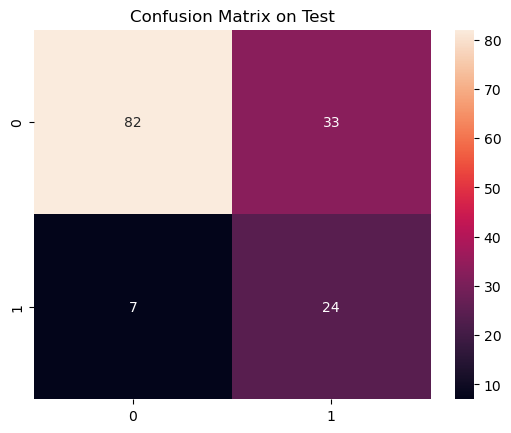

In [30]:
#Creating a SVC model with the best features obtained from Gridsearch

svcbestmodel=SVC(C=1, gamma=0.0001)
getModel(svcbestmodel)

# Naive Bayes

GaussianNB()

Accuracy on test is : 	 0.7465753424657534 
ReCall on test is : 	 0.7272727272727273 
F1 on test is : 	 0.6336633663366337 
Precision on test is : 	 0.5614035087719298

Accuracy on train is : 	 0.7689655172413793 
ReCall on train is : 	 0.654054054054054 
F1 on train is : 	 0.6436170212765957 
Precision on train is : 	 0.6335078534031413


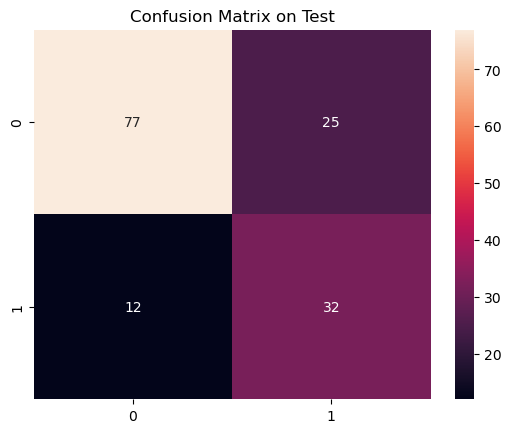

In [31]:
NB_model= GaussianNB()
getModel(NB_model)

# K Nearest Neighbour Classifier

In [32]:
#Hyperparameter tuning using gridsearch to find out the parameters which would give the best results

knn_model = KNeighborsClassifier()
KNN_parameters = {'n_neighbors': [3,4,5,6,7,8],
              'weights': ['uniform', 'distance']}
knn_models = GridSearchCV(knn_model, KNN_parameters, cv=5).fit(x_train, y_train)


In [33]:
knn_models.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}

KNeighborsClassifier(n_neighbors=8)

Accuracy on test is : 	 0.7191780821917808 
ReCall on test is : 	 0.75 
F1 on test is : 	 0.5393258426966292 
Precision on test is : 	 0.42105263157894735

Accuracy on train is : 	 0.7896551724137931 
ReCall on train is : 	 0.8 
F1 on train is : 	 0.6013071895424836 
Precision on train is : 	 0.4816753926701571


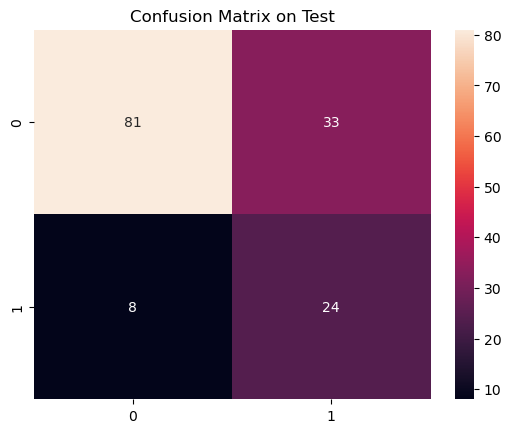

In [34]:
#Creating a KNN model with the best features obtained from Gridsearch

knn_bestmodel=KNeighborsClassifier(n_neighbors= 8, weights= 'uniform')
getModel(knn_bestmodel)

In [35]:
#Creating a Dataframe to plot all the metrics on a single graph

finalResult_test = pd.DataFrame({'Techniques':columns, 'Accuracies':result_testAcc, 'ReCall':result_testRec, 'F1':result_testF1, 'Precision':result_testprec})
finalResult_train = pd.DataFrame({'Techniques':columns, 'Accuracies':result_trainAcc, 'ReCall':result_trainRec, 'F1':result_trainF1, 'Precision':result_trainprec})

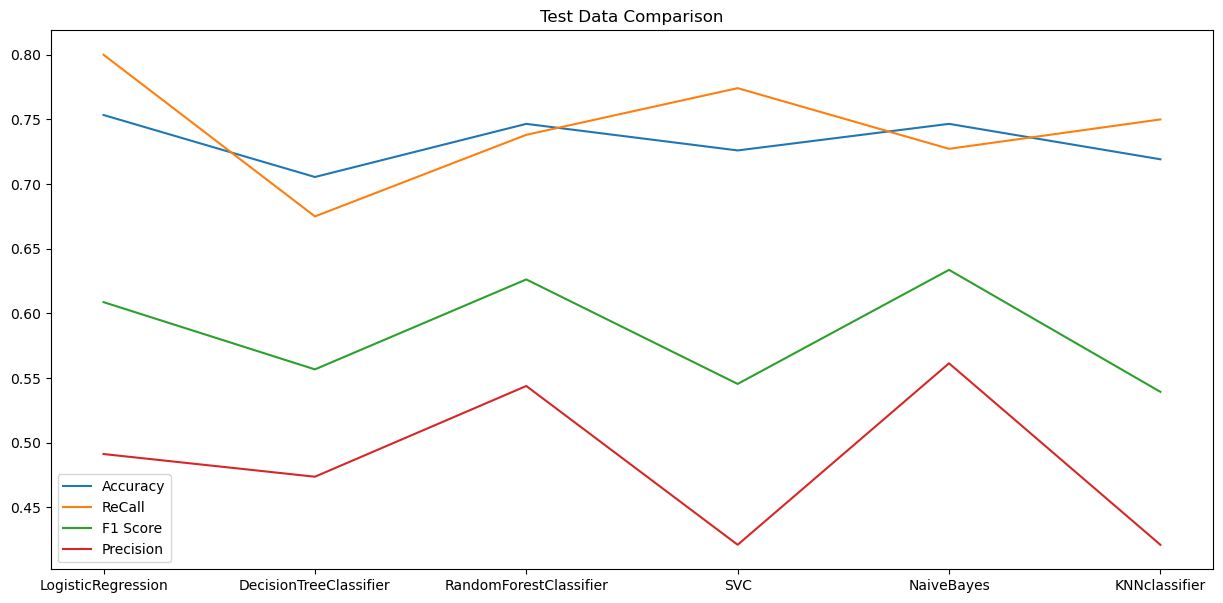

In [36]:
#Plotting all the metrics for the test data to check the performance of the model

fig,ax=plt.subplots(figsize=(15,7))
plt.plot(finalResult_test.Techniques, result_testAcc ,label='Accuracy')
plt.plot(finalResult_test.Techniques, result_testRec, label='ReCall')
plt.plot(finalResult_test.Techniques, result_testF1 , label='F1 Score')
plt.plot(finalResult_test.Techniques, result_testprec , label='Precision')
plt.title("Test Data Comparison")
plt.legend()
plt.show()

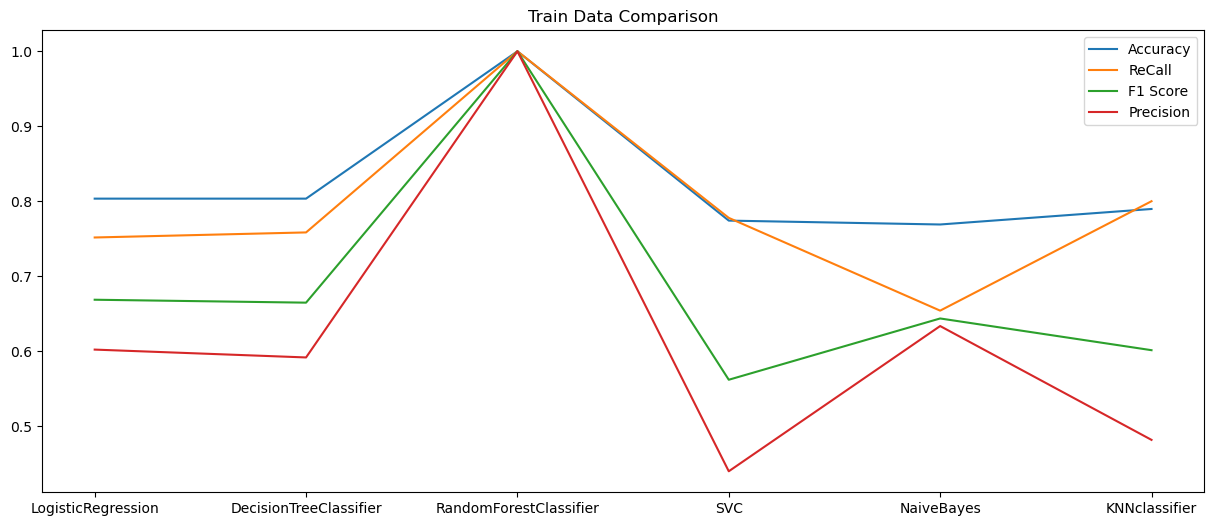

In [37]:
#Plotting all the metrics for the Train data to check the performance of the model

fig,ax=plt.subplots(figsize=(15,6))
plt.plot(finalResult_train.Techniques, result_trainAcc ,label='Accuracy')
plt.plot(finalResult_train.Techniques, result_trainRec, label='ReCall')
plt.plot(finalResult_train.Techniques, result_trainF1 , label='F1 Score')
plt.plot(finalResult_test.Techniques, result_trainprec , label='Precision')
plt.title("Train Data Comparison")
plt.legend()
plt.show()

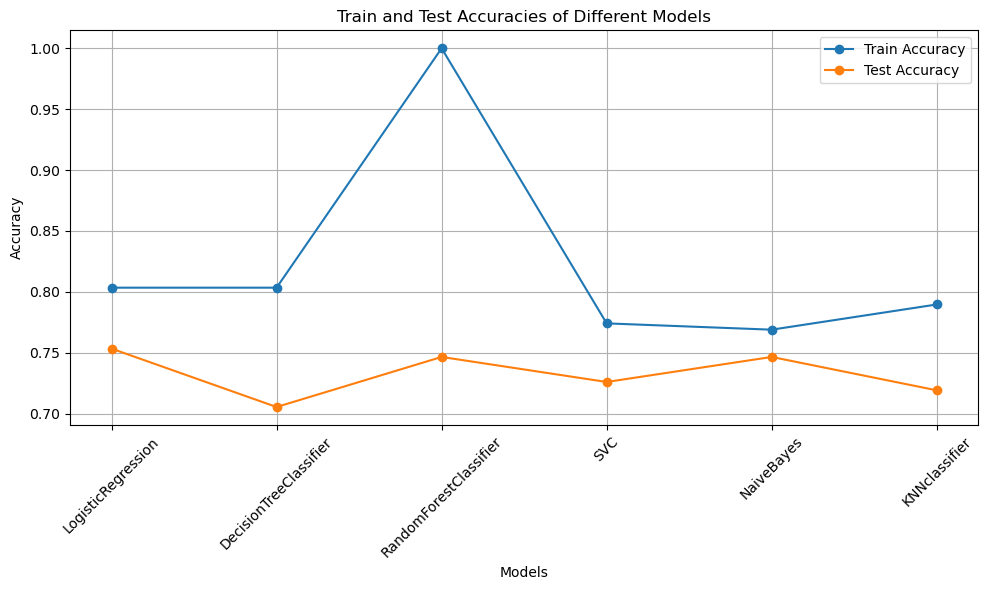

In [38]:
#Plotting the accuracies of both Train and dest data for comparison

plt.figure(figsize=(10, 6))
plt.plot(result_trainAcc, label='Train Accuracy', marker='o')
plt.plot(result_testAcc, label='Test Accuracy', marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(range(len(columns)), columns, rotation=45)
plt.title('Train and Test Accuracies of Different Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()